# People Analytic Project - Colacho Company, Inc

## Salary Database

## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 2. Import our database

We are going to import our database and use it to create a new data frame for the salaries. We will use column names, surnames, work department, and ID. Also we will add some new columns too.

In [2]:
# Let's import our data frame
cdf_rawdata = pd.read_csv('colacho_database.csv')
cdf_rawdata

Name    Surname  Gender WorkDepartment      ID  \
0      John      Smith    male        Account  SZ2174   
1     Emily    Johnson  female        Account  ZG8243   
2   Michael   Williams    male          Sales  LB2444   
3     Sarah      Jones  female           HHRR  ZG2248   
4     David      Brown    male     Operations  JE3473   
..      ...        ...     ...            ...     ...   
95  Madelyn  Alexander  female     Operations  SU8337   
96  Brayden    Russell    male        Account  NU0471   
97    Elena    Griffin  female     Operations  HT8585   
98   Oliver       Diaz    male           HHRR  QH3190   
99     Anna      Hayes  female           HHRR  JM2926   

                          Address    Birthday  Age  
0     0487 Hull Village Suite 759  2003-04-08   20  
1              242 Christine Glen  1965-02-27   58  
2             1157 Michael Island  1996-10-16   27  
3                 778 Brown Plaza  1995-11-29   28  
4           60975 Jessica Squares  1957-09-02   66  
..                            ...         ...  ...  
95  003 Alexander Shoal Suite 105  1957-11-29   66  
96  37625 Thompson Isle Suite 606  1985-01-06   38  
97       870 Robert Loaf Apt. 082  1963-07-05   60  
98           53230 Julia Villages  1978-03-05   45  
99            169 Christine Mount  1955-07-31   68  

[100 rows x 8 columns]

### 2.1 Salaries data frame

It's time to create our new data frame for the employees salaries

In [3]:
# Create the new data frame in a new variable
cdf_salary = cdf_rawdata[['ID', 'Name', 'Surname', 'WorkDepartment']].copy()

# Checking if the data frame has the information needed
cdf_salary

ID     Name    Surname WorkDepartment
0   SZ2174     John      Smith        Account
1   ZG8243    Emily    Johnson        Account
2   LB2444  Michael   Williams          Sales
3   ZG2248    Sarah      Jones           HHRR
4   JE3473    David      Brown     Operations
..     ...      ...        ...            ...
95  SU8337  Madelyn  Alexander     Operations
96  NU0471  Brayden    Russell        Account
97  HT8585    Elena    Griffin     Operations
98  QH3190   Oliver       Diaz           HHRR
99  JM2926     Anna      Hayes           HHRR

[100 rows x 4 columns]

### 2.2 Create the new columns

With the new data frame, now we can add the new columns, base salary, experience

#### 2.2.a Salary

In [4]:
# For this example we are not going to use a date to calculate the years the employees have in the company. 
# Instead, we will generate the number by using a random function

# Salaries
salary = np.random.randint(18000, 75000, size = 100)
cdf_salary['Salary'] = salary

cdf_salary 

ID     Name    Surname WorkDepartment  Salary
0   SZ2174     John      Smith        Account   58694
1   ZG8243    Emily    Johnson        Account   68734
2   LB2444  Michael   Williams          Sales   72195
3   ZG2248    Sarah      Jones           HHRR   22344
4   JE3473    David      Brown     Operations   21531
..     ...      ...        ...            ...     ...
95  SU8337  Madelyn  Alexander     Operations   19536
96  NU0471  Brayden    Russell        Account   63372
97  HT8585    Elena    Griffin     Operations   49178
98  QH3190   Oliver       Diaz           HHRR   54154
99  JM2926     Anna      Hayes           HHRR   53523

[100 rows x 5 columns]

#### 2.2.b Experience

In [5]:
# Create the random number generator
exp_years = np.random.uniform(0, 8, size=100)

# Convert the years of experience into months
exp_months = exp_years * 12

# Round our numbers into one decimal
exp_months_rounded = np.round(exp_months)

# Put the values into the column 'Experience'
cdf_salary['Experience'] = exp_months_rounded

# Check our data frame
cdf_salary

ID     Name    Surname WorkDepartment  Salary  Experience
0   SZ2174     John      Smith        Account   58694        28.0
1   ZG8243    Emily    Johnson        Account   68734        46.0
2   LB2444  Michael   Williams          Sales   72195        58.0
3   ZG2248    Sarah      Jones           HHRR   22344        72.0
4   JE3473    David      Brown     Operations   21531        15.0
..     ...      ...        ...            ...     ...         ...
95  SU8337  Madelyn  Alexander     Operations   19536        47.0
96  NU0471  Brayden    Russell        Account   63372        36.0
97  HT8585    Elena    Griffin     Operations   49178        43.0
98  QH3190   Oliver       Diaz           HHRR   54154        56.0
99  JM2926     Anna      Hayes           HHRR   53523        62.0

[100 rows x 6 columns]

#### 2.3 Some numbers

Let's use .describe() method to see some details about salary information and experience

In [6]:
# Basic statistics from 'Salary' and 'Experience' columns
cdf_salary[['Salary', 'Experience']].describe()

Salary  Experience
count    100.000000  100.000000
mean   47439.660000   50.560000
std    17124.951892   26.425928
min    18183.000000    3.000000
25%    32124.250000   30.500000
50%    49239.500000   49.000000
75%    60620.500000   74.000000
max    73589.000000   96.000000

#### 2.3.a Correlation between Salary and Experience

[[ 1.         -0.02052559]
 [-0.02052559  1.        ]]


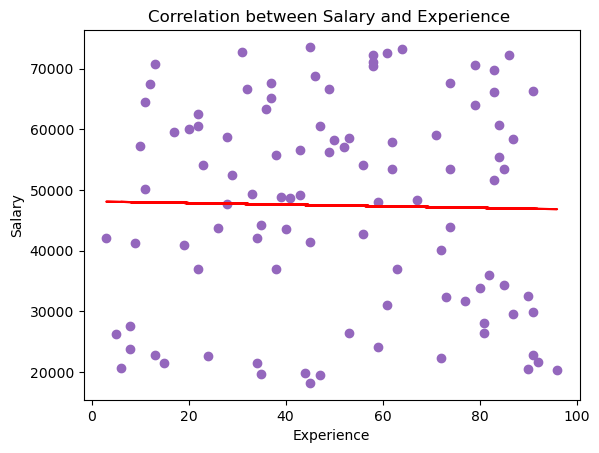

In [7]:
# Visualizing our data with a scatterplot
x = cdf_salary['Experience'];
y = cdf_salary['Salary'];
plt.scatter(x = x, y = y, color='#9467bd')
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)
lreg = np.corrcoef(x, y)
plt.plot(x, m*x+b, color='red')
# Labels and title
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Correlation between Salary and Experience ')
print(lreg)

In [8]:
import statsmodels.formula.api as smf
model = smf.ols('Salary ~ Experience', data = cdf_salary).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.04130
Date:                Wed, 13 Dec 2023   Prob (F-statistic):              0.839
Time:                        14:42:02   Log-Likelihood:                -1116.2
No. Observations:                 100   AIC:                             2236.
Df Residuals:                      98   BIC:                             2242.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.811e+04   3729.751     12.900      0.000    4.07e+04    5.55e+04
Experience   -13.3013     65.448     -0.203      0.839    -143.180     116.578
==============================================================================
Omnibus:                       41.015   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.046
Skew:                          -0.198   Prob(JB):                       0.0295
Kurtosis:                       1.762   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# Let's predict our salaries for each experience years
pred1 = model.predict(pd.DataFrame(cdf_salary['Experience']))
print(pred1)

0     47739.737776
1     47500.314019
2     47340.698180
3     47154.479702
4     47912.654934
          ...     
95    47487.012699
96    47633.327217
97    47540.217978
98    47367.300820
99    47287.492901
Length: 100, dtype: float64


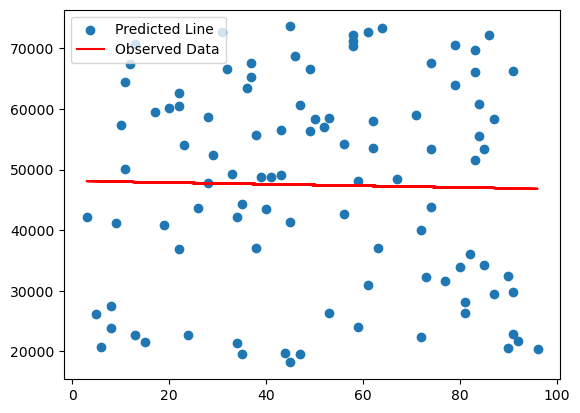

In [10]:
# Regression Line
plt.scatter(x, y)
plt.plot(x, pred1, 'r')
plt.legend(['Predicted Line', 'Observed Data'])
plt.show()

In [11]:
# Error Calculation
res1 = y - pred1
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
print(rmse1)

17035.522328550174


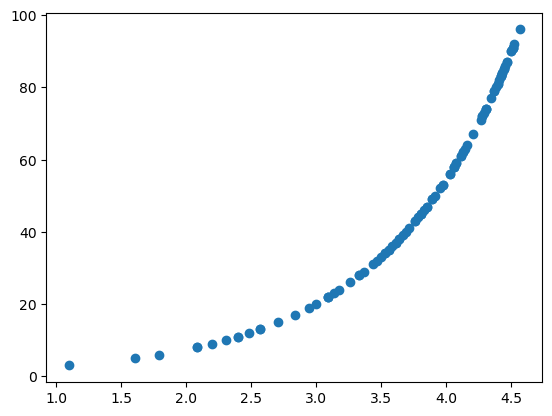

In [12]:
# Transformed data
# Log Transformation
plt.scatter(x = np.log(x), y = x)
np.corrcoef(np.log(x), y)
model2 = smf.ols('Salary ~ Experience', data = cdf_salary)

#### 2.3.b Separating data

Let's work with the data on different ways

2.3.b.1 Counting the number of employees per department

In [13]:
# Counting employees per department
cdf_salary_count = cdf_salary['WorkDepartment'].value_counts()
cdf_salary_count


HHRR          24
Marketing     24
Operations    22
Sales         17
Account       13
Name: WorkDepartment, dtype: int64

<Axes: title={'center': 'Employees per department'}>

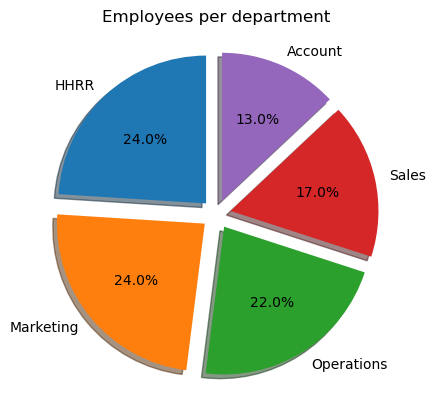

In [14]:
# Creating a plot to visualize the data
explode = [0.1] * len(cdf_salary_count)
cdf_salary['WorkDepartment'].value_counts().plot(
    kind='pie',
    explode=explode,
    title='Employees per department',
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    ylabel=''
)

2.3.b.2 Sorting values by 'Experience' and 'Salary'

In [15]:
cdf_salary.sort_values(['Experience', 'Salary'], ascending=False)

ID       Name    Surname WorkDepartment  Salary  Experience
19  RH0053    Abigail   Robinson        Account   20378        96.0
58  UG0788     Daniel     Murphy      Marketing   21697        92.0
40  KR3331     Edward   Mitchell      Marketing   66309        91.0
93  JI1684  Gabriella   Gonzales          Sales   29843        91.0
88  LO3156    Gabriel     Flores           HHRR   22806        91.0
..     ...        ...        ...            ...     ...         ...
80  FV7585      Isaac  Henderson          Sales   27565         8.0
56  ET9072   Nicholas     Morgan        Account   23835         8.0
75  BV1209   Savannah      Price     Operations   20713         6.0
12  EF3588     Andrew    Jackson          Sales   26255         5.0
13  MZ3212       Emma      White           HHRR   42158         3.0

[100 rows x 6 columns]

2.3.b.3 Group our data by Department

In [16]:
# Creating a dictionary to store the data from 'WorkDepartment'
grouped_departments = {}

# Group the data by each department, we also need to copy the data
for department, data in cdf_salary.groupby('WorkDepartment'):
    grouped_departments[department] = data.copy()
    
# Checking if the data is ok
print(grouped_departments)

{'Account':         ID      Name   Surname WorkDepartment  Salary  Experience
0   SZ2174      John     Smith        Account   58694        28.0
1   ZG8243     Emily   Johnson        Account   68734        46.0
19  RH0053   Abigail  Robinson        Account   20378        96.0
24  VI4934     David    Walker        Account   44257        35.0
53  FQ5081    Aubrey    Rogers        Account   24076        59.0
56  ET9072  Nicholas    Morgan        Account   23835         8.0
57  BH7650      Zoey      Bell        Account   19824        44.0
60  UM4299     Aiden    Rivera        Account   33860        80.0
61  CC6460  Brooklyn    Cooper        Account   42127        34.0
64  AM0081     Dylan    Howard        Account   30985        61.0
70  LD5111    Nathan     James        Account   72621        61.0
94  ID3572     Aaron    Bryant        Account   52413        29.0
96  NU0471   Brayden   Russell        Account   63372        36.0, 'HHRR':         ID      Name     Surname WorkDepartment  Salary

In [17]:
# Now we can create our data frame for each department by accessing our dictionary
sales_df = grouped_departments['Sales']
account_df = grouped_departments['Account']
hhrr_df = grouped_departments['HHRR']
operations_df = grouped_departments['Operations']
marketing_df = grouped_departments['Marketing']
sales_df

ID       Name    Surname WorkDepartment  Salary  Experience
2   LB2444    Michael   Williams          Sales   72195        58.0
6   GD4300     Daniel     Miller          Sales   64451        11.0
7   NK9946     Olivia     Wilson          Sales   66589        49.0
12  EF3588     Andrew    Jackson          Sales   26255         5.0
16  QT6110     Joseph   Thompson          Sales   55506        84.0
22  ME7089    William      Lewis          Sales   67646        37.0
34  ER4294    Richard      Green          Sales   70584        79.0
35  WR3782   Victoria      Adams          Sales   48703        41.0
37  MW3541      Avery   Gonzalez          Sales   59561        17.0
39  BU9606      Sofia     Carter          Sales   58297        50.0
48  FY3880      Henry    Edwards          Sales   29514        87.0
67  HX0309       Leah   Peterson          Sales   18183        45.0
79  VC2960      Riley       Ross          Sales   72681        31.0
80  FV7585      Isaac  Henderson          Sales   27565         8.0
81  YB9747    Aaliyah    Coleman          Sales   34310        85.0
82  SB3766  Christian    Jenkins          Sales   60564        47.0
93  JI1684  Gabriella   Gonzales          Sales   29843        91.0

2.3.b.4 Number of employees per department

In [18]:
# Let's count the employees per department using a function
def countEmployees(df):
    return df.shape[0]

sales_count = countEmployees(sales_df)
account_count = countEmployees(account_df)
hhrr_count = countEmployees(hhrr_df)
operations_count = countEmployees(operations_df)
marketing_count = countEmployees(marketing_df)

print(
    "Number of employees in Sales: ", sales_count, "\n",
    "Number of employees in HHRR: ", hhrr_count, "\n",
    "Number of employees in Account: ", account_count, "\n",
    "Number of employees in Marketing: ", marketing_count, "\n",
    "Number of employees in Operations: ", operations_count,
    )

Number of employees in Sales:  17 
 Number of employees in HHRR:  24 
 Number of employees in Account:  13 
 Number of employees in Marketing:  24 
 Number of employees in Operations:  22


#### 2.3.c Correlation between Salary and Experience per department

<p>Now that we have separated the data into departments, we can analyze the correlation between Salary and Experience per department</p>
<p>-> For this calculations we are not going to use the prediction model <-</p>

2.3.c.1 Sales Department

[[ 1.         -0.06433463]
 [-0.06433463  1.        ]]


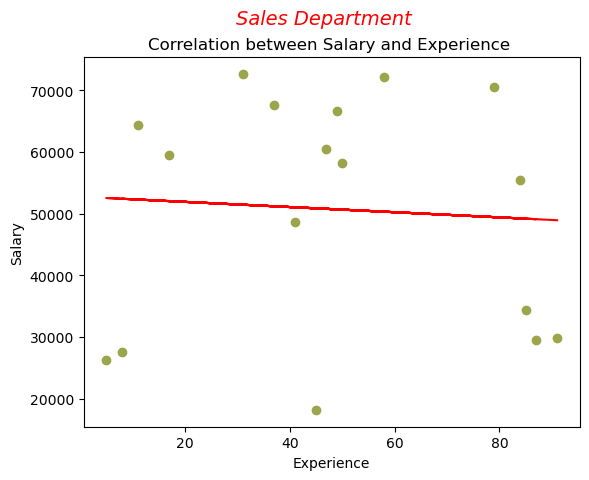

In [29]:
# Using a scatter plot to visualize the correlation between Salary and Experience
x = sales_df['Experience']
y = sales_df['Salary']
color = '#9ba64b'
plot = plt.scatter(x = x, y = y, color=color)
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)
lreg = np.corrcoef(x, y)
plt.plot(x, m*x+b, color='red')
# Labels and title
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.suptitle('Sales Department', style='italic', fontsize=14, color='red')
plt.title('Correlation between Salary and Experience ')
print(lreg)


2.3.c.2 HHRR Department

[[ 1.         -0.03556674]
 [-0.03556674  1.        ]]


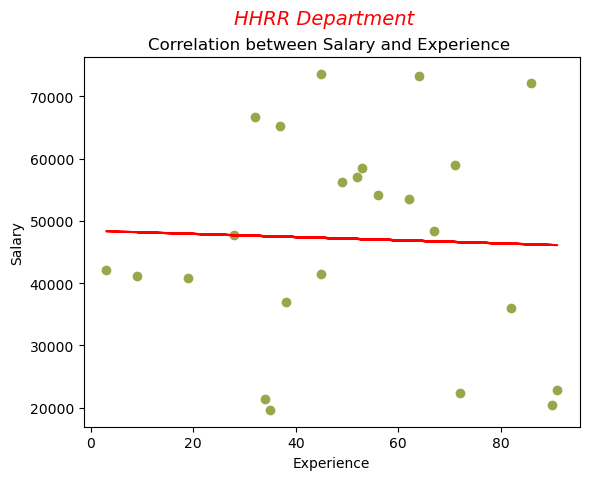

In [31]:
# Using a scatter plot to visualize the correlation between Salary and Experience
x = hhrr_df['Experience']
y = hhrr_df['Salary']
color = '#9ba64b'
plot = plt.scatter(x = x, y = y, color=color)
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)
lreg = np.corrcoef(x, y)
plt.plot(x, m*x+b, color='red')
# Labels and title
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.suptitle('HHRR Department', style='italic', fontsize=14, color='red')
plt.title('Correlation between Salary and Experience ')
print(lreg)

2.3.c.3 Account Department

[[ 1.         -0.24160341]
 [-0.24160341  1.        ]]


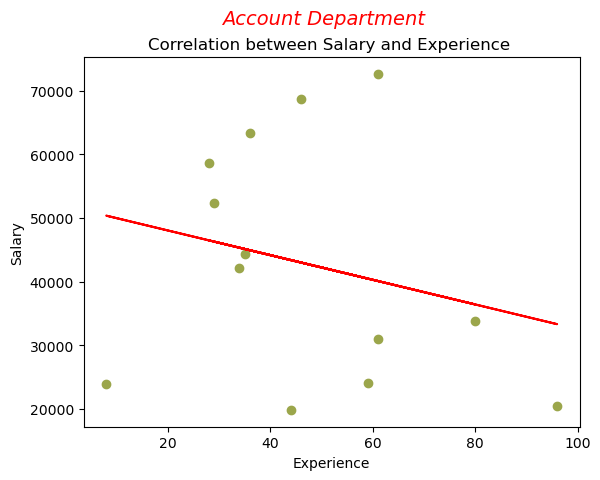

In [32]:
x = account_df['Experience']
y = account_df['Salary']
color = '#9ba64b'
plot = plt.scatter(x = x, y = y, color=color)
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)
lreg = np.corrcoef(x, y)
plt.plot(x, m*x+b, color='red')
# Labels and title
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.suptitle('Account Department', style='italic', fontsize=14, color='red')
plt.title('Correlation between Salary and Experience ')
print(lreg)

2.3.c.4 Marketing Department

[[1.         0.07352061]
 [0.07352061 1.        ]]


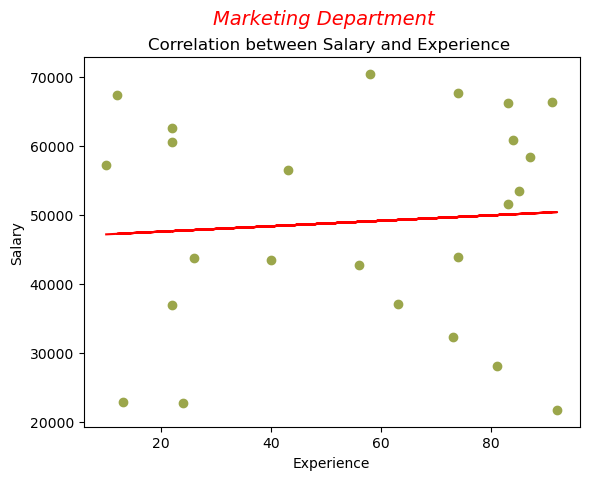

In [33]:
x = marketing_df['Experience']
y = marketing_df['Salary']
color = '#9ba64b'
plot = plt.scatter(x = x, y = y, color=color)
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)
lreg = np.corrcoef(x, y)
plt.plot(x, m*x+b, color='red')
# Labels and title
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.suptitle('Marketing Department', style='italic', fontsize=14, color='red')
plt.title('Correlation between Salary and Experience ')
print(lreg)

2.3.c.5 Operations Department

[[1.         0.02472314]
 [0.02472314 1.        ]]


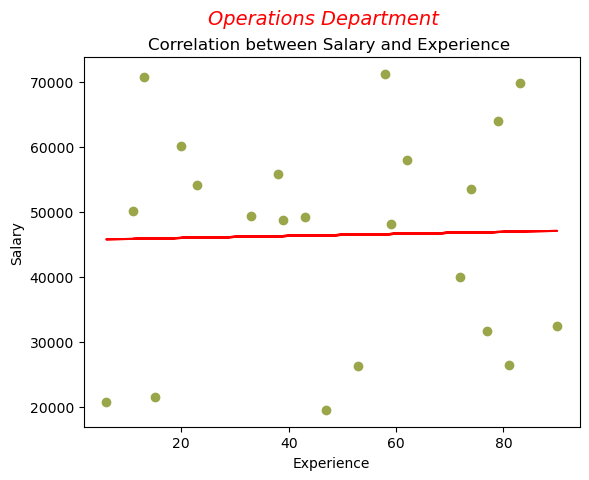

In [34]:
x = operations_df['Experience']
y = operations_df['Salary']
color = '#9ba64b'
plot = plt.scatter(x = x, y = y, color=color)
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)
lreg = np.corrcoef(x, y)
plt.plot(x, m*x+b, color='red')
# Labels and title
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.suptitle('Operations Department', style='italic', fontsize=14, color='red')
plt.title('Correlation between Salary and Experience ')
print(lreg)